シグモイド曲線

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

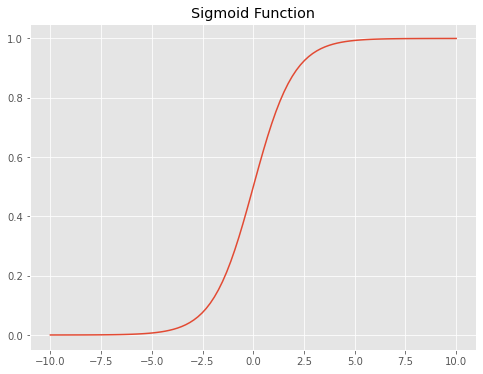

In [2]:
x = np.linspace(-10, 10, 100)
y = 1/(1+np.exp(-x))

fig = plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title('Sigmoid Function')
fig.savefig('SigmoidFunction.png')

勾配降下法

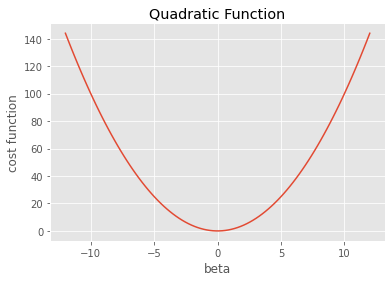

In [39]:
x = np.linspace(-12, 12, 100)
y = x**2

plt.plot(x,y)
plt.title('Quadratic Function')
plt.xlabel('beta')
plt.ylabel('cost function')
plt.savefig('QuadraticFunction.png')

参考  
https://watlab-blog.com/2020/02/29/gradient-descent/

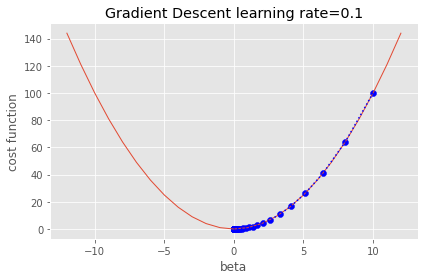

In [38]:
import numpy as np
from matplotlib import pyplot as plt

# グラフプロット用基準関数
def f(x):
    y = x ** 2
    return y
# 基準関数の導関数
def df(x):
    dy = 2 * x
    return dy

# 勾配降下法に必要なパラメータ
eta = 0.1                          # 学習率
max_iteration = 1000                # 最大反復回数
x0 = 10                             # 初期値
x_pred = [x0]                       # 描画用軌跡リスト(初期値をプリセット)

# 最大反復回数まで計算する
for i in range(max_iteration):
    x0 = x0 - eta * df(x0)          # 勾配降下法
    x_pred.append(x0)               # 軌跡をリストに追加
    #print(i, x0)

x_pred = np.array(x_pred)           # 描画用にnumpy配列変換

# 基準関数の表示用
x = np.arange(-12, 13, 1)
y = f(x)

# ここからグラフ描画-------------------------------------------------
# フォントの種類とサイズを設定する。
#plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
#plt.rcParams['xtick.direction'] = 'in'
#plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.yaxis.set_ticks_position('both')
#ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# データプロットの準備。
ax1.plot(x, y, lw=1)
ax1.scatter(x_pred, f(x_pred), color='blue')
ax1.plot(x_pred, f(x_pred), color='blue', linestyle='dotted')

# グラフタイトル
plt.title('Gradient Descent learning rate={}'.format(eta))
plt.xlabel('beta')
plt.ylabel('cost function')

# グラフを表示する。
fig.tight_layout()
plt.show()
plt.close()
fig.savefig('GradientDescent_alpha{}.png'.format(eta))
# -------------------------------------------------------------------

線型関数

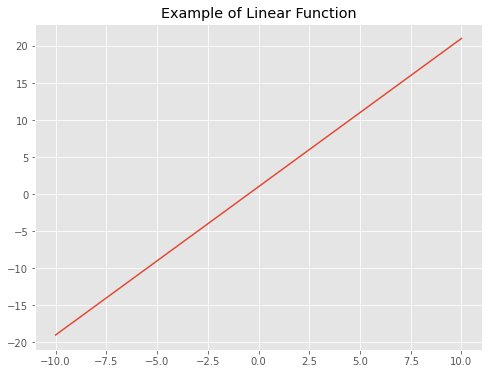

In [5]:
x = np.linspace(-10, 10, 100)
y = 2*x + 1

fig = plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title('Example of Linear Function')
fig.savefig('LinearFunction.png')

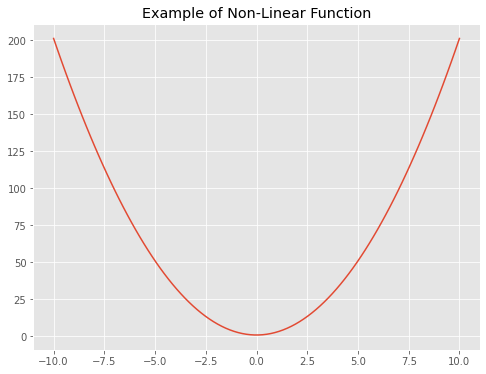

In [6]:
x = np.linspace(-10, 10, 100)
y = 2*x**2 + 1

fig = plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title('Example of Non-Linear Function')
fig.savefig('NonLinearFunction.png')

バイアスとバリアンス

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

%matplotlib inline

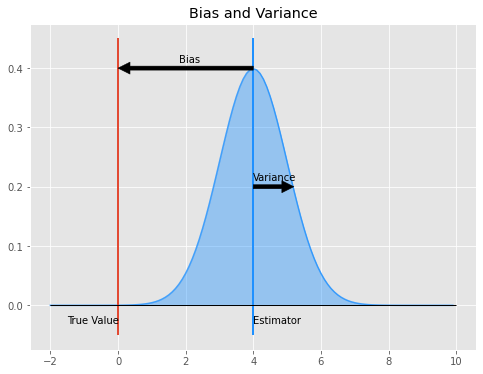

In [89]:
X = np.arange(start=-2, stop=10, step=0.1)

fig = plt.figure(figsize=(8,6))

# 標本平均
norm_pdf = stats.norm.pdf(x=X, loc=4, scale=1)
plt.vlines(4, -0.05, 0.45, lw=2, linestyles='solid', color='dodgerblue')
plt.plot(X, norm_pdf, color='dodgerblue', alpha=0.8)
plt.fill_between(X, 0.0, norm_pdf, color='dodgerblue', alpha=0.4)
plt.text(4.0, -0.03, 'Estimator')

# 真の平均
plt.vlines(0, -0.05, 0.45, lw=2, linestyles='solid')
plt.text(-1.5, -0.03, 'True Value')

# バイアス
plt.annotate(text='', xy=(0.0, 0.4), xytext=(4.0, 0.4), arrowprops=dict(color='k', width=4))
plt.text(1.8, 0.41, 'Bias')

# バリアンス
plt.annotate(text='', xy=(5.2, 0.2), xytext=(4.0, 0.2), arrowprops=dict(color='k', width=4))
plt.text(4.0, 0.21, 'Variance')

plt.hlines(0, -2, 10, lw=1, linestyles='solid', color='k')
plt.title('Bias and Variance')
fig.savefig('BiasAndVariance.png')
plt.show()

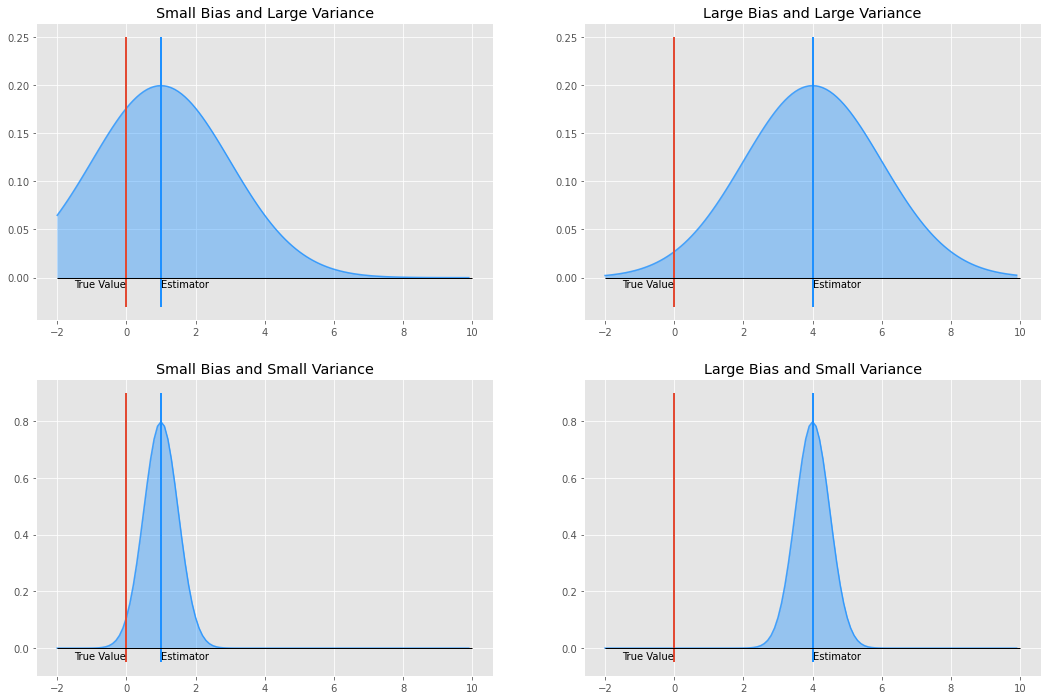

In [106]:
X = np.arange(start=-2, stop=10, step=0.1)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(18,12))

# バイアス小・バリアンス大
norm_pdf = stats.norm.pdf(x=X, loc=1, scale=2)
ax[0,0].vlines(1, -0.03, 0.25, lw=2, linestyles='solid', color='dodgerblue')
ax[0,0].plot(X, norm_pdf, color='dodgerblue', alpha=0.8)
ax[0,0].fill_between(X, 0.0, norm_pdf, color='dodgerblue', alpha=0.4)
ax[0,0].text(1.0, -0.01, 'Estimator')

ax[0,0].vlines(0, -0.03, 0.25, lw=2, linestyles='solid')
ax[0,0].text(-1.5, -0.01, 'True Value')

ax[0,0].hlines(0, -2, 10, lw=1, linestyles='solid', color='k')
ax[0,0].set_title('Small Bias and Large Variance')

# バイアス大・バリアンス大
norm_pdf = stats.norm.pdf(x=X, loc=4, scale=2)
ax[0,1].vlines(4, -0.03, 0.25, lw=2, linestyles='solid', color='dodgerblue')
ax[0,1].plot(X, norm_pdf, color='dodgerblue', alpha=0.8)
ax[0,1].fill_between(X, 0.0, norm_pdf, color='dodgerblue', alpha=0.4)
ax[0,1].text(4.0, -0.01, 'Estimator')

ax[0,1].vlines(0, -0.03, 0.25, lw=2, linestyles='solid')
ax[0,1].text(-1.5, -0.01, 'True Value')

ax[0,1].hlines(0, -2, 10, lw=1, linestyles='solid', color='k')
ax[0,1].set_title('Large Bias and Large Variance')

# バイアス小・バリアンス小
norm_pdf = stats.norm.pdf(x=X, loc=1, scale=0.5)
ax[1,0].vlines(1, -0.05, 0.9, lw=2, linestyles='solid', color='dodgerblue')
ax[1,0].plot(X, norm_pdf, color='dodgerblue', alpha=0.8)
ax[1,0].fill_between(X, 0.0, norm_pdf, color='dodgerblue', alpha=0.4)
ax[1,0].text(1.0, -0.04, 'Estimator')

ax[1,0].vlines(0, -0.05, 0.9, lw=2, linestyles='solid')
ax[1,0].text(-1.5, -0.04, 'True Value')

ax[1,0].hlines(0, -2, 10, lw=1, linestyles='solid', color='k')
ax[1,0].set_title('Small Bias and Small Variance')

# バイアス大・バリアンス小
norm_pdf = stats.norm.pdf(x=X, loc=4, scale=0.5)
ax[1,1].vlines(4, -0.05, 0.9, lw=2, linestyles='solid', color='dodgerblue')
ax[1,1].plot(X, norm_pdf, color='dodgerblue', alpha=0.8)
ax[1,1].fill_between(X, 0.0, norm_pdf, color='dodgerblue', alpha=0.4)
ax[1,1].text(4.0, -0.04, 'Estimator')

ax[1,1].vlines(0, -0.05, 0.9, lw=2, linestyles='solid')
ax[1,1].text(-1.5, -0.04, 'True Value')

ax[1,1].hlines(0, -2, 10, lw=1, linestyles='solid', color='k')
ax[1,1].set_title('Large Bias and Small Variance')

fig.savefig('BiasAndVariance2.png')
#fig.show()